In [16]:
import nltk

from nltk.tokenize import word_tokenize, sent_tokenize, casual_tokenize, MWETokenizer
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.probability import FreqDist
from nltk import pos_tag

import pandas

# Task 1. Reading the .txt file.

Open with the python open function the file “class_11_biology_chapter_1_0.txt” from the “TEST/biology” folder. Extract the full content of the file in one unique string at the lower case.
NOTE: The following tasks should be done on the string in the lower case.


In [52]:
f = open('./DATA/BIO_CS_DATA/TEST/biology/class_11_biology_chapter_1_0.txt', 'r')

file_str = ''.join(f.readlines()).lower().replace('\n', '') # scapam de \n, caci nu reprezinta nici o valoare

In [18]:
file_str

'chapter 1the living worldchapter 2biological classificationchapter 3plant kingdomchapter 4animal kingdom unit idiversity in the living worldbiology is the science of life forms and living processes. the living worldcomprises an amazing diversity of living organisms. early man couldeasily perceive the difference between inanimate matter and livingorganisms. early man deified some of the inanimate matter (wind, sea,fire etc.) and some among the animals and plants. a common feature ofall such forms of inanimate and animate objects was the sense of aweor fear that they evoked. the description of living organisms includinghuman beings began much later in human history. societies whichindulged in anthropocentric view of biology could register limitedprogress in biological knowledge. systematic and monumentaldescription of life forms brought in, out of necessity, detailed systemsof identification, nomenclature and classification. the biggest spin offof such studies was the recognition of the

# Task 2. Obtain the file metadata.

Get the following metadata about the content of the file.
###### HINT: Save the unique tokens obtained by every tokenizer in a set you will need it for the next task.

### 1. The number of sentences extracted by sent_tokenize from nltk.

In [19]:
sentences = sent_tokenize(file_str)

In [20]:
len(sentences)

12

### 2. The number of unique tokens obtained with word_tokenize from nltk.

In [53]:
tokens_word = word_tokenize(file_str)
tokens_word_set = set(tokens_word) # salvam set-ul pentru urmatorul task

In [22]:
len(tokens_word)

223

### 3. The number of unique tokens obtained with casual_tokenize from nltk.

In [54]:
tokens_casual = casual_tokenize(file_str)
tokens_casual_set = set(tokens_casual) # salvam set-ul pentru urmatorul task

In [24]:
len(tokens_casual)

228

### 4. The number of unique tokens obtained with MWETokenizer from nltk.

In [55]:
mwe = MWETokenizer([('in', 'the'), ('get', 'a')])
tokens_mwe = mwe.tokenize(casual_tokenize(file_str))
tokens_mwe_set = set(tokens_mwe) # salvam set-ul pentru urmatorul task

In [26]:
len(tokens_mwe)

226

### 5. The mean number of words (tokens) per sentence in the text by every tokenizer.

In [56]:
# lista numarului de tokenuri pentru fiecare propozitie in dependenta de tokenizer
mean_list = []

# initializam variabile pentru calcularea mediei
mean_word = 0
mean_casual = 0
mean_mwe = 0

for s in sentences:
    mean_list.append({
        'word_tokenizer': len(word_tokenize(s)),
        'casual_tokenizer': len(casual_tokenize(s)),
        'MWETokenizer': len(mwe.tokenize(casual_tokenize(s)))
        })

    # sumam numarul de tokenuri din propozitia data cu variabila respectiva
    mean_word += len(word_tokenize(s))
    mean_casual += len(casual_tokenize(s))
    mean_mwe += len(mwe.tokenize(casual_tokenize(s)))

# calculam media aritmetica
sentences_len = len(sentences)
mean_word /= sentences_len
mean_casual /= sentences_len
mean_mwe /= sentences_len

In [57]:
mean_word

18.583333333333332

In [58]:
mean_casual

19.0

In [59]:
mean_mwe

18.833333333333332

# Task 3. Comparing the Stemmers.

Get the union of all unique tokens found by every tokenizer. 

Use this new created set to find the stemmed form of this token generated by every of the following stemmers - **PorterStemmer**, **LancasterStemmer** and **SnowballStemmer**.

Save the result in a pandas DataFrame. Compare the result and differences of every stemmer.

In [29]:
token_union = tokens_word_set.union(tokens_casual_set).union(tokens_mwe_set)

Setarea stemmer-urilor

In [30]:
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer(language='english')

Obtinem listele necesare pentru DateFrame

In [31]:
original_token_list = [t for t in token_union]
stemmed_list_porter = [porter.stem(t) for t in token_union]
stemmed_list_lancaster = [lancaster.stem(t) for t in token_union]
stemmed_list_snowball = [snowball.stem(t) for t in token_union]

Cream un DateFrame.

In [60]:
df = pandas.DataFrame(data={
    'original_token': original_token_list,
    'porter': stemmed_list_porter,
    'lancaster': stemmed_list_lancaster,
    'snowball': stemmed_list_snowball
    })

In [61]:
df

,original_token,porter,lancaster,snowball
0,conservation,conserv,conserv,conserv
1,evoked,evok,evok,evok
2,plants,plant,plant,plant
3,vertically,vertic,vert,vertic
4,knowledge,knowledg,knowledg,knowledg
...,...,...,...,...
138,could,could,could,could
139,both,both,both,both
140,perspective,perspect,perspect,perspect
141,detailed,detail,detail,detail


# Task 4. Frequencies of words.

Using the lower case string obtained from the file, get the frequencies of the word. What are the 10 most frequent tokens? 

Extract the list of the hapaxes.

Plot the frequency of the words in the descending order as a scatter plot, How similar it is to the zipf law? Why?


In [35]:
freq_dist = FreqDist(casual_tokenize(file_str))
most_common = freq_dist.most_common(10)

In [36]:
freq_dist

FreqDist({'of': 14, '.': 12, 'the': 11, 'and': 10, ',': 9, 'living': 6, 'in': 6, 'organisms': 4, 'a': 4, 'forms': 3, ...})

In [37]:
most_common

[('of', 14),
 ('.', 12),
 ('the', 11),
 ('and', 10),
 (',', 9),
 ('living', 6),
 ('in', 6),
 ('organisms', 4),
 ('a', 4),
 ('forms', 3)]

In [38]:
hapaxes = freq_dist.hapaxes()

In [39]:
hapaxes

['chapter',
 '1the',
 'worldchapter',
 '2biological',
 'classificationchapter',
 '3plant',
 'kingdomchapter',
 '4animal',
 'kingdom',
 'idiversity',
 'worldbiology',
 'is',
 'science',
 'processes',
 'worldcomprises',
 'an',
 'amazing',
 'diversity',
 'couldeasily',
 'perceive',
 'difference',
 'between',
 'livingorganisms',
 'deified',
 '(',
 'wind',
 'sea',
 'fire',
 'etc',
 ')',
 'among',
 'common',
 'feature',
 'ofall',
 'animate',
 'objects',
 'sense',
 'aweor',
 'fear',
 'they',
 'evoked',
 'includinghuman',
 'beings',
 'began',
 'much',
 'later',
 'human',
 'history',
 'societies',
 'whichindulged',
 'anthropocentric',
 'view',
 'biology',
 'could',
 'register',
 'limitedprogress',
 'biological',
 'knowledge',
 'systematic',
 'monumentaldescription',
 'brought',
 'out',
 'necessity',
 'detailed',
 'systemsof',
 'identification',
 'nomenclature',
 'classification',
 'biggest',
 'spin',
 'offof',
 'studies',
 'recognition',
 'sharing',
 'similarities',
 'amongliving',
 'both',
 'h

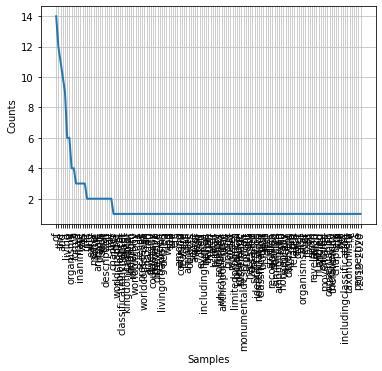

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [40]:
freq_dist.plot()

- Se observa, in primul rand, ca majoritatea cuvintelor sunt hapaxe din cauza ca corpus-ul este mic.
- Din acelasi motiv, se observa 'alunecari' din ce in ce mai vizible apropiindu-ne de y=1.
- Daca am fi avut un corpus gigantic, graficul ar fi fost apropiat de o functie liniara la aparenta.
- Din grafic se observa ca fie avem cuvinte foarte des intalnite, fie avem hapaxe, ceea ce indica ca avem un corpus mic.

# Task 5. Part of speech tagging.

Extract from the text the part of speech of every token, and group them in dictionary with the following form:

##### {“POS” : [list of tokens with this POS] }

What is the most common part of speech and why? What is the part of speech that has the smallest frequency?

In [62]:
pos = pos_tag(casual_tokenize(file_str))
pos_dict = { tag: [] for (word, tag) in pos } # initializam dictionarul, fiecare parte de vorbire va fi cheie

# adaugam tokenurile in lista partii de vorbire din care face parte
for (word, tag) in pos:
    pos_dict[tag].append(word)

In [63]:
pos_dict

{'NN': ['chapter',
  'living',
  'worldchapter',
  'classificationchapter',
  'kingdomchapter',
  'kingdom',
  'unit',
  'idiversity',
  'living',
  'worldbiology',
  'science',
  'life',
  'living',
  'living',
  'diversity',
  'living',
  'man',
  'difference',
  'matter',
  'livingorganisms',
  'man',
  'matter',
  'wind',
  'sea',
  'fire',
  'etc',
  'feature',
  'ofall',
  'inanimate',
  'sense',
  'aweor',
  'description',
  'living',
  'history',
  'view',
  'biology',
  'limitedprogress',
  'knowledge',
  'monumentaldescription',
  'life',
  'necessity',
  'systemsof',
  'identification',
  'nomenclature',
  'classification',
  'spin',
  'offof',
  'recognition',
  'sharing',
  'dayliving',
  'earth',
  'revelation',
  'man',
  'conservation',
  'biodiversity',
  'unit',
  'description',
  'includingclassification',
  'taxonomistâ'],
 'CD': ['1the', '2biological', '3plant', '4animal'],
 'IN': ['in',
  'of',
  'of',
  'between',
  'of',
  'among',
  'of',
  'of',
  'that',
  'o

Determinam frecventa partilor de vorbire in corpus-ul dat.

In [44]:
pos_tag_fd = FreqDist(tag for (word, tag) in pos).most_common()

In [45]:
pos_tag_fd

[('NN', 59),
 ('IN', 29),
 ('DT', 24),
 ('JJ', 20),
 ('NNS', 18),
 ('.', 12),
 ('VBD', 11),
 ('CC', 10),
 (',', 9),
 ('RB', 6),
 ('CD', 4),
 ('VBZ', 3),
 ('TO', 3),
 ('VBP', 2),
 ('PRP', 2),
 ('MD', 2),
 ('VB', 2),
 ('VBN', 2),
 ('VBG', 2),
 ('NNP', 2),
 ('(', 1),
 (')', 1),
 ('RBR', 1),
 ('JJS', 1),
 ('WP', 1),
 ('WDT', 1)]

- Se observa ca cea mai frecventa parte de vorbire este substantivul. In cazul corpus-ului nostru asta este un lucru motivat de faptul ca continutul este o lucrare stiintifica si se opereaza cu multi termeni.
- Cele mai putin utilizate parti de vorbire din corpus-ul dat sunt: *adverbul comparativ*, *adjectivul in superlativ* si *verbul in present tense*. Toate aceste se intalnesc o singura data in corpus-ul studiat.